In [23]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(230101033)

def create_data(n_points=10):
    # Generate n_points random x values in the range [0, 1]
    x = np.random.rand(n_points)

    # Calculate the corresponding y values
    y = np.sin(1 + x**2) + np.random.normal(0, 0.03, n_points)

    # Combine x and y into a list of tuples
    data = list(zip(x, y))

    return data

# Create the three datasets
D1_train, D1_test = create_data(), create_data()
D2_train, D2_test = create_data(), create_data()
D3_train, D3_test = create_data(), create_data()

# Show the datasets
print("D1_train: ", D1_train)
print("D1_test: ", D1_test)

print("D2_train: ", D2_train)
print("D2_test: ", D2_test)

print("D3_train: ", D3_train)
print("D3_test: ", D3_test)


D1_train:  [(0.8990969243252928, 1.006480699382302), (0.27261926839503803, 0.8408178044662137), (0.315709558013176, 0.8530009055867426), (0.9046848555151994, 0.9649653025075138), (0.6218795838827986, 1.0121719258313915), (0.3516678182134215, 0.9391853509821291), (0.9819389777731684, 0.8954106637554976), (0.8635335234147797, 0.9787146197157007), (0.11243014245327432, 0.8469826792858676), (0.4958737257710768, 0.9585866473406484)]
D1_test:  [(0.2985197925594921, 0.8582435772914869), (0.5262157265326215, 0.9474405140417396), (0.13898845047870023, 0.8808808556992126), (0.036512915036850835, 0.8510765871802901), (0.07499947645216642, 0.8305520837678677), (0.7437273815080293, 1.0292260234710109), (0.09453383124551373, 0.867597670682032), (0.13154199538515965, 0.8406235659426896), (0.5096987564186908, 0.9774063116925829), (0.9012391845069566, 0.9205532951871722)]
D2_train:  [(0.38085780854636897, 0.9168960285890615), (0.10502139490989071, 0.813851588737226), (0.15091662370547698, 0.79875093921

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

def train_model(data, degree):
    # Split the data into X and y
    X = np.array([x for x, y in data])
    y = np.array([y for x, y in data])
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X[:, np.newaxis], y)
    return model

# Store the results
results = []

# For each dataset
for i, (train_data, test_data) in enumerate([(D1_train, D1_test), (D2_train, D2_test), (D3_train, D3_test)]):
    # For each degree from 1 to 9
    for degree in range(1, 10):
        # Train the model
        model = train_model(train_data, degree)
        
        # Calculate E_in and E_out
        X_train = np.array([x for x, y in train_data])
        y_train = np.array([y for x, y in train_data])
        E_in = mean_squared_error(y_train, model.predict(X_train[:, np.newaxis]))
        
        X_test = np.array([x for x, y in test_data])
        y_test = np.array([y for x, y in test_data])
        E_out = mean_squared_error(y_test, model.predict(X_test[:, np.newaxis]))
        
        # Store the results
        results.append({
            'Dataset': f'D{i+1}',
            'Degree': degree,
            'E_in': E_in,
            'E_out': E_out
        })

# Convert the results to a DataFrame for easier viewing
import pandas as pd
results_df = pd.DataFrame(results)

# Calculate the mean of E_in and E_out for each Degree
mean_results = results_df.groupby('Degree')[['E_in', 'E_out']].mean()

# Print the results with column separators
print(mean_results.to_string(float_format="{:0.5f}".format, col_space=10))

                 E_in           E_out
Degree                               
1             0.00141         0.00103
2             0.00092         0.00140
3             0.00052         0.00068
4             0.00050         0.00070
5             0.00032         0.00874
6             0.00029         0.02145
7             0.00021         0.79495
8             0.00011        56.97352
9             0.00000 353751297.28512


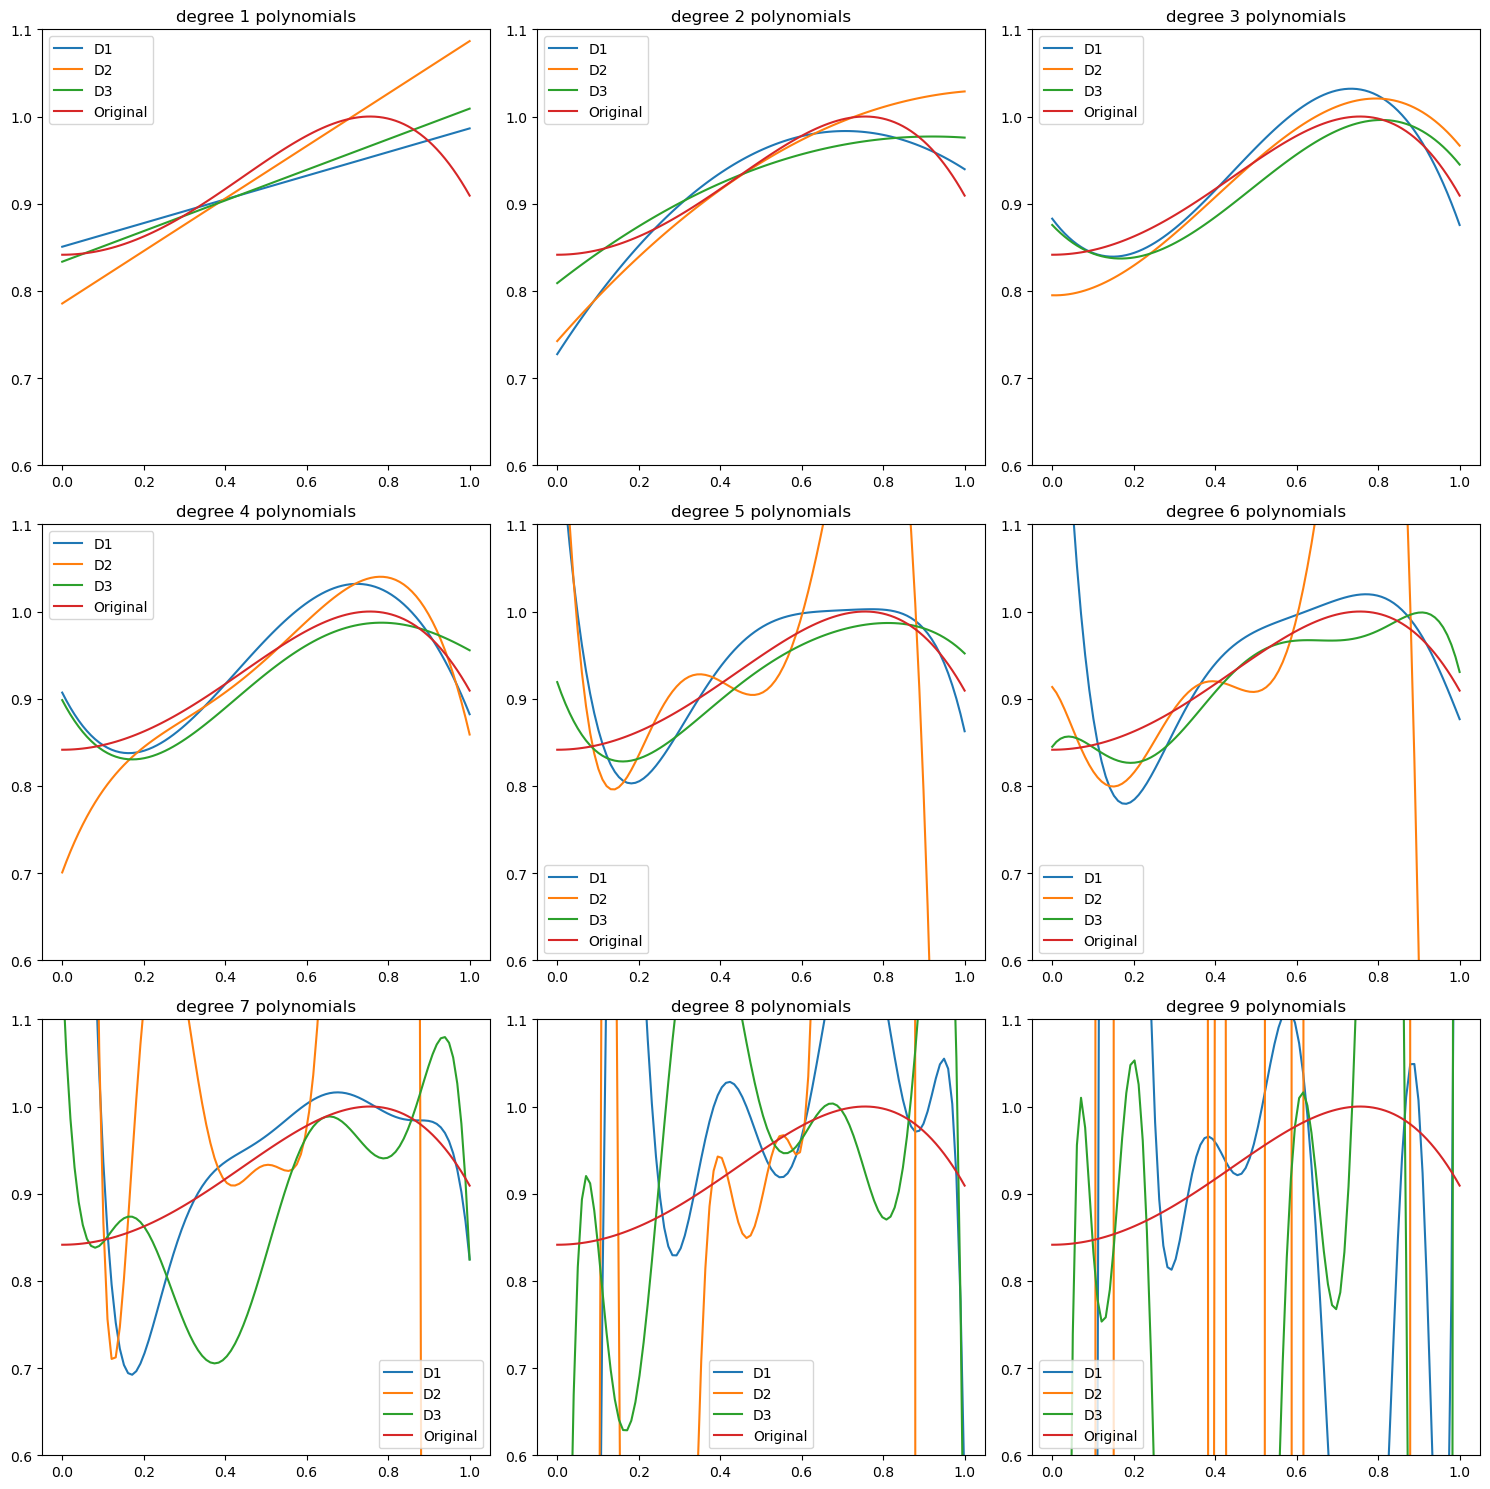

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# For each degree from 1 to 9
for degree in range(1, 10):
    # For each dataset
    for i, (train_data, test_data) in enumerate([(D1_train, D1_test), (D2_train, D2_test), (D3_train, D3_test)]):
        # Train the model
        model = train_model(train_data, degree)
        
        # Plot the trained function
        X = np.linspace(0, 1, 100)
        axs[(degree-1)//3, (degree-1)%3].plot(X, model.predict(X[:, np.newaxis]), label=f'D{i+1}')
        
    # Plot the original function
    axs[(degree-1)//3, (degree-1)%3].plot(X, np.sin(1 + X**2), label='Original')
    axs[(degree-1)//3, (degree-1)%3].legend()
    axs[(degree-1)//3, (degree-1)%3].set_title(f'degree {degree} polynomials')
    axs[(degree-1)//3, (degree-1)%3].set_ylim([0.6, 1.1])  # Set y-axis limits

# Show the plot
plt.tight_layout()
plt.show()

Nhận xét về bias và variance của các mô hình:

- Mô hình với ít đa thức (độ phức tạp thấp) có thể có bias cao và variance thấp. Điều này có nghĩa là mô hình có thể không khớp tốt với dữ liệu huấn luyện (underfitting).

- Mô hình với nhiều đa thức (độ phức tạp cao) có thể có bias thấp và variance cao. Điều này có nghĩa là mô hình có thể khớp quá mức với dữ liệu huấn luyện và không thể tổng quát hóa tốt với dữ liệu mới (overfitting).

                 E_in      E_out
Degree                          
1             0.00185    0.00176
2             0.00123    0.00126
3             0.00089    0.00079
4             0.00089    0.00079
5             0.00088    0.00080
6             0.00087    0.00083
7             0.00085    0.00087
8             0.00085    0.00085
9             0.00084    0.00091


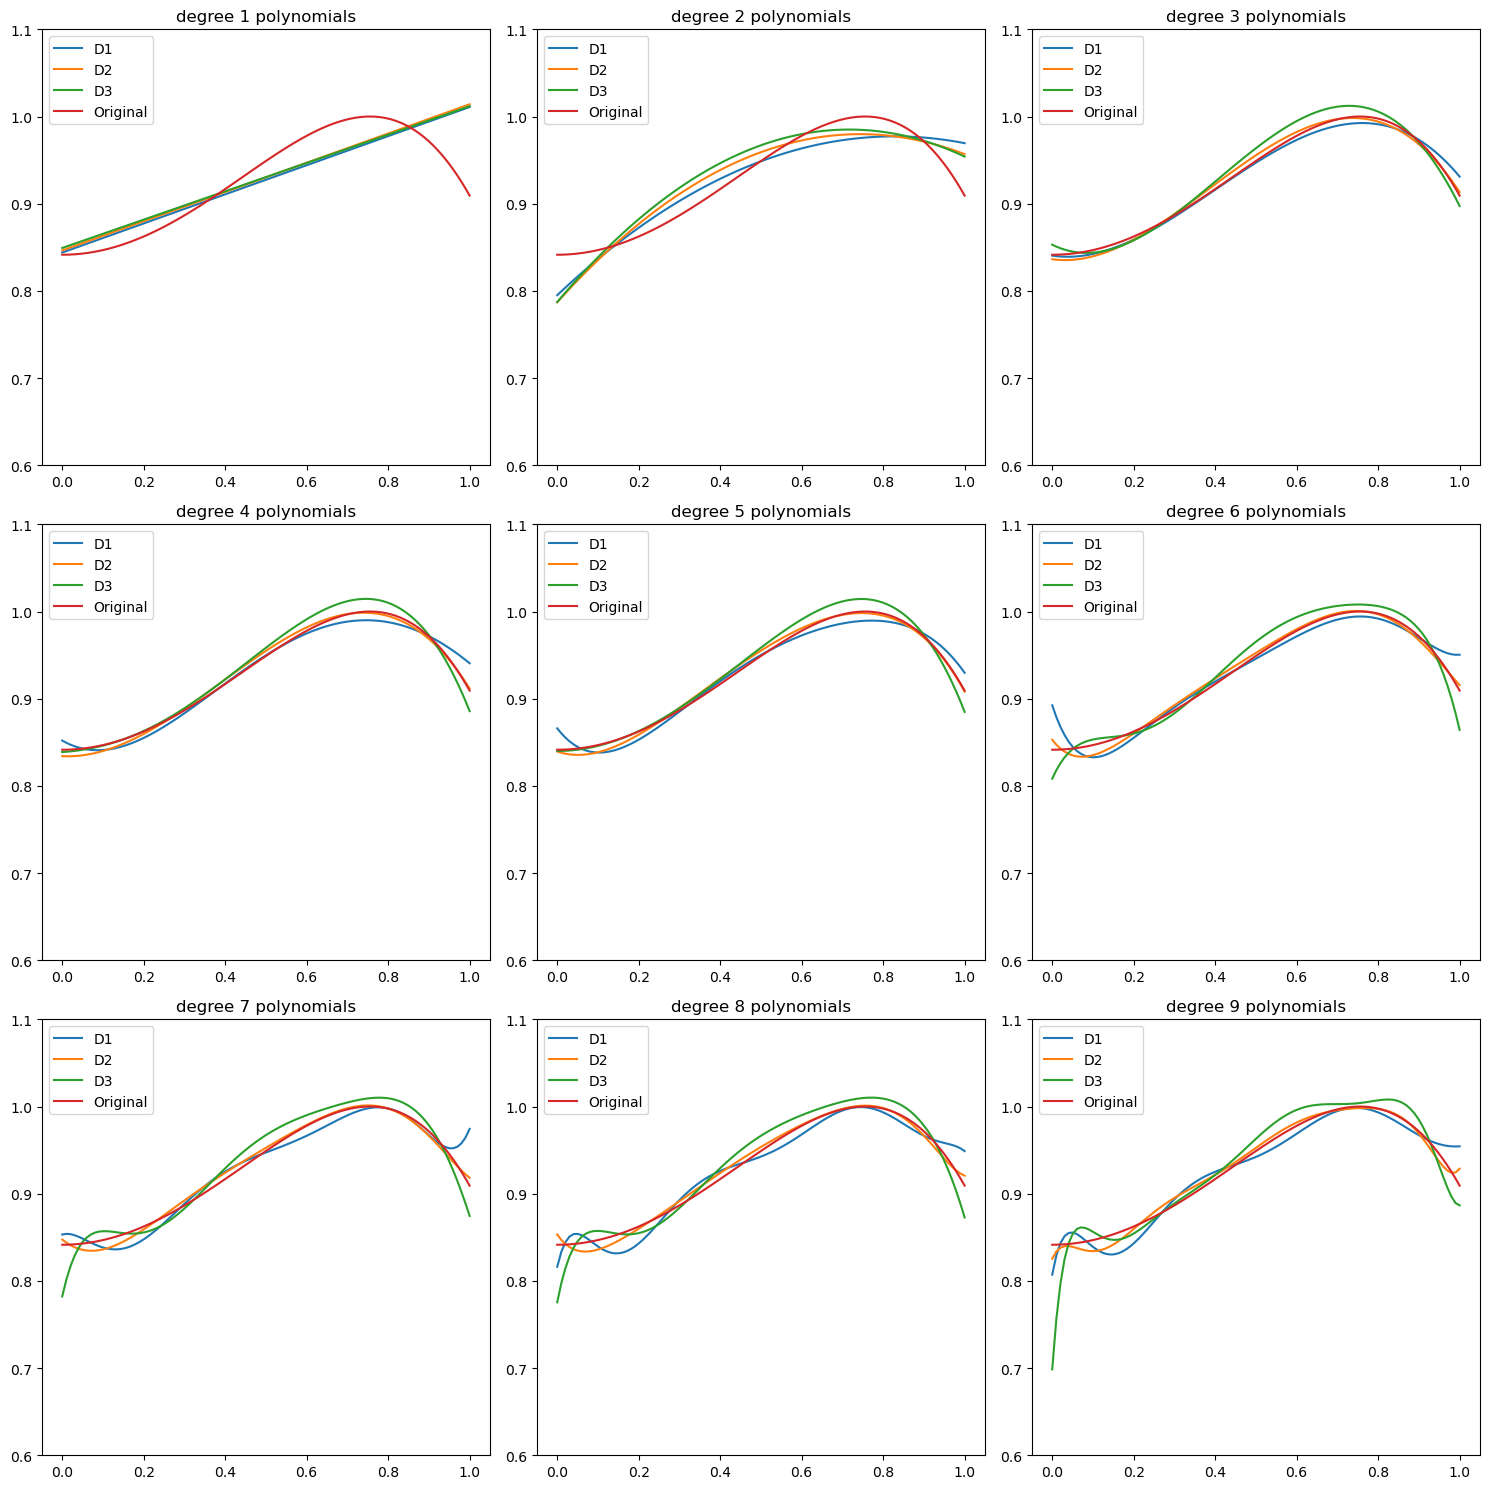

In [24]:
# Create the three datasets
n_points = 100

D1_train, D1_test = create_data(n_points), create_data(n_points)
D2_train, D2_test = create_data(n_points), create_data(n_points)
D3_train, D3_test = create_data(n_points), create_data(n_points)

# Store the results
results = []

# For each dataset
for i, (train_data, test_data) in enumerate([(D1_train, D1_test), (D2_train, D2_test), (D3_train, D3_test)]):
    # For each degree from 1 to 9
    for degree in range(1, 10):
        # Train the model
        model = train_model(train_data, degree)
        
        # Calculate E_in and E_out
        X_train = np.array([x for x, y in train_data])
        y_train = np.array([y for x, y in train_data])
        E_in = mean_squared_error(y_train, model.predict(X_train[:, np.newaxis]))
        
        X_test = np.array([x for x, y in test_data])
        y_test = np.array([y for x, y in test_data])
        E_out = mean_squared_error(y_test, model.predict(X_test[:, np.newaxis]))
        
        # Store the results
        results.append({
            'Dataset': f'D{i+1}',
            'Degree': degree,
            'E_in': E_in,
            'E_out': E_out
        })

# Convert the results to a DataFrame for easier viewing
import pandas as pd
results_df = pd.DataFrame(results)

# Calculate the mean of E_in and E_out for each Degree
mean_results = results_df.groupby('Degree')[['E_in', 'E_out']].mean()

# Print the results with column separators
print(mean_results.to_string(float_format="{:0.5f}".format, col_space=10))

# Create a figure with 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# For each degree from 1 to 9
for degree in range(1, 10):
    # For each dataset
    for i, (train_data, test_data) in enumerate([(D1_train, D1_test), (D2_train, D2_test), (D3_train, D3_test)]):
        # Train the model
        model = train_model(train_data, degree)
        
        # Plot the trained function
        X = np.linspace(0, 1, 100)
        axs[(degree-1)//3, (degree-1)%3].plot(X, model.predict(X[:, np.newaxis]), label=f'D{i+1}')
        
    # Plot the original function
    axs[(degree-1)//3, (degree-1)%3].plot(X, np.sin(1 + X**2), label='Original')
    axs[(degree-1)//3, (degree-1)%3].legend()
    axs[(degree-1)//3, (degree-1)%3].set_title(f'degree {degree} polynomials')
    axs[(degree-1)//3, (degree-1)%3].set_ylim([0.6, 1.1])  # Set y-axis limits

# Show the plot
plt.tight_layout()
plt.show()

                 E_in      E_out
Degree                          
1             0.00167    0.00167
2             0.00126    0.00130
3             0.00092    0.00091
4             0.00091    0.00091
5             0.00091    0.00091
6             0.00091    0.00091
7             0.00091    0.00091
8             0.00091    0.00091
9             0.00091    0.00091


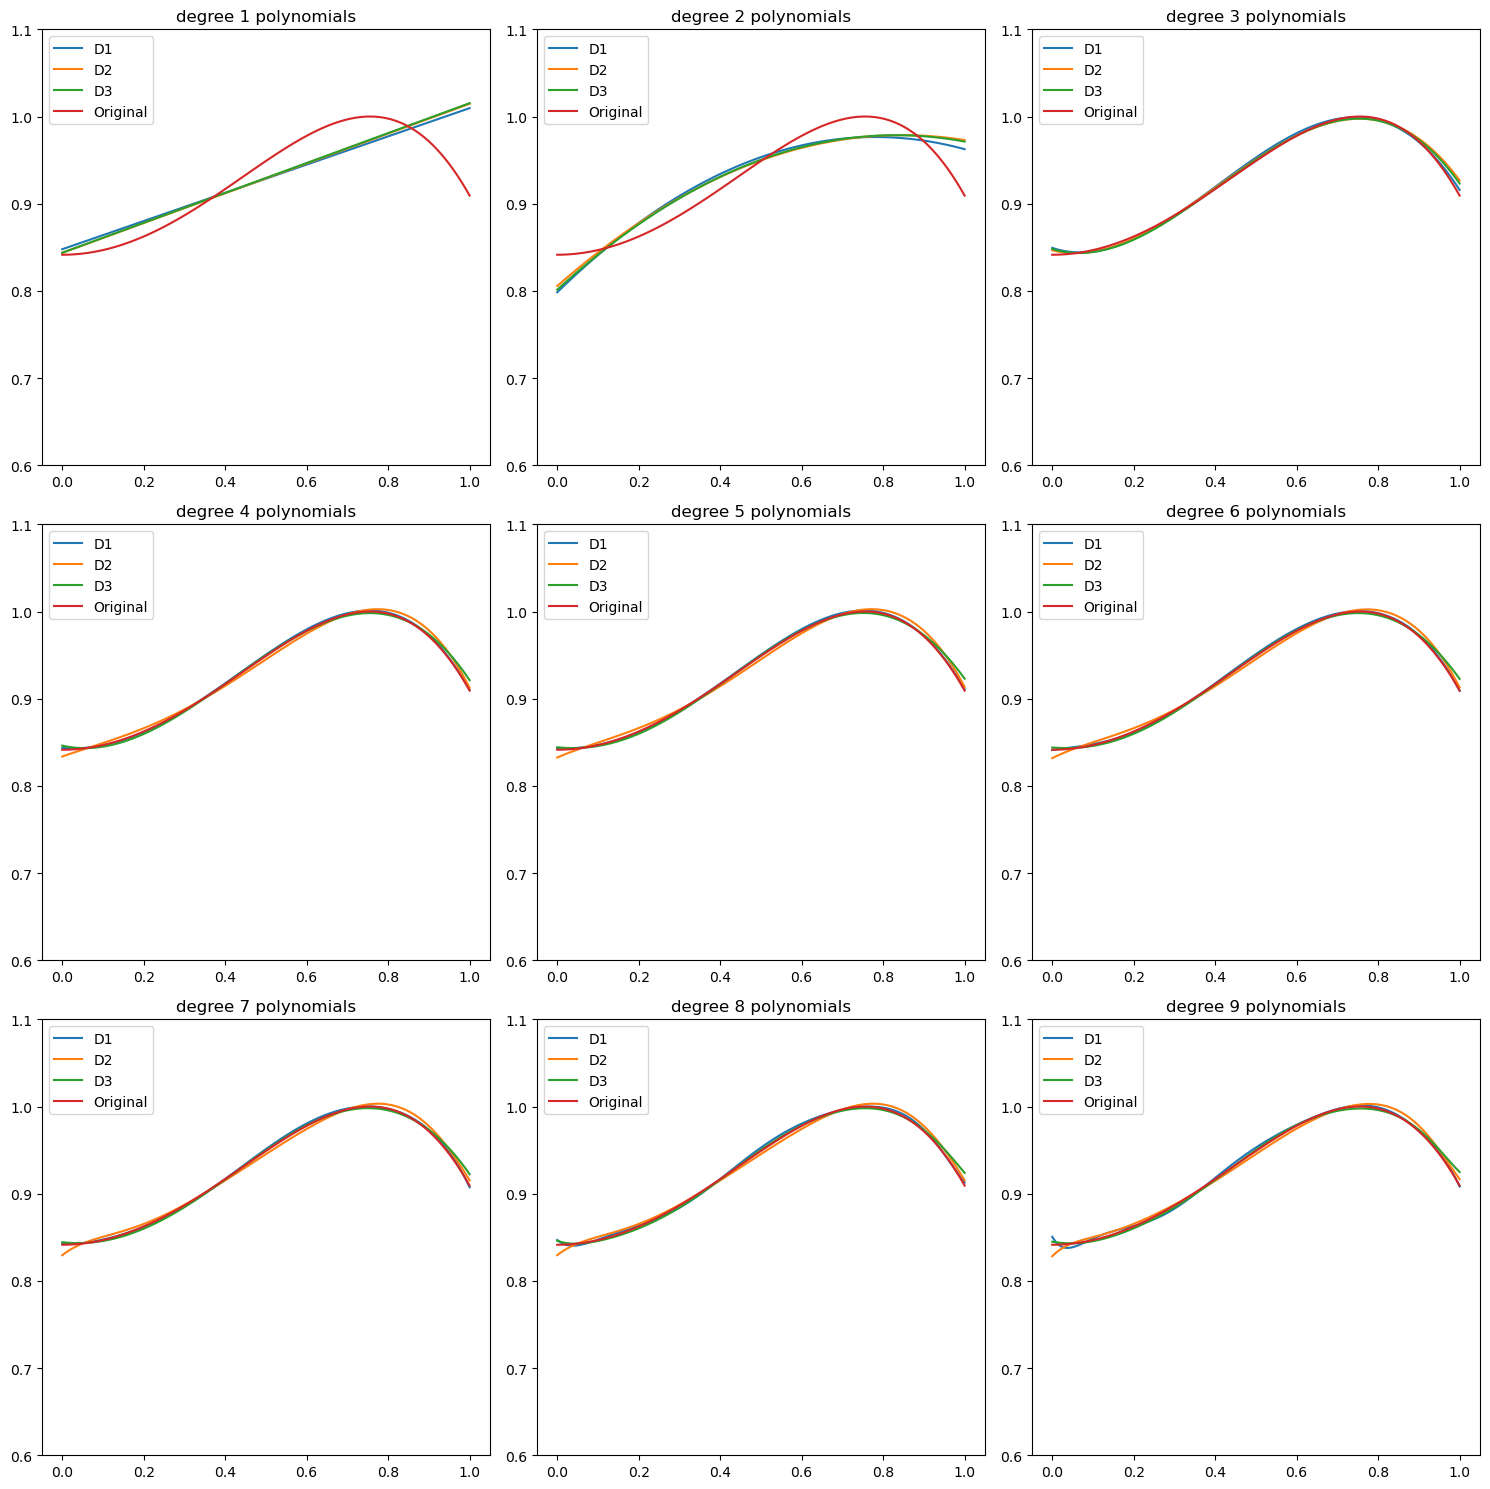

In [25]:
# Create the three datasets
n_points = 1000

D1_train, D1_test = create_data(n_points), create_data(n_points)
D2_train, D2_test = create_data(n_points), create_data(n_points)
D3_train, D3_test = create_data(n_points), create_data(n_points)

# Store the results
results = []

# For each dataset
for i, (train_data, test_data) in enumerate([(D1_train, D1_test), (D2_train, D2_test), (D3_train, D3_test)]):
    # For each degree from 1 to 9
    for degree in range(1, 10):
        # Train the model
        model = train_model(train_data, degree)
        
        # Calculate E_in and E_out
        X_train = np.array([x for x, y in train_data])
        y_train = np.array([y for x, y in train_data])
        E_in = mean_squared_error(y_train, model.predict(X_train[:, np.newaxis]))
        
        X_test = np.array([x for x, y in test_data])
        y_test = np.array([y for x, y in test_data])
        E_out = mean_squared_error(y_test, model.predict(X_test[:, np.newaxis]))
        
        # Store the results
        results.append({
            'Dataset': f'D{i+1}',
            'Degree': degree,
            'E_in': E_in,
            'E_out': E_out
        })

# Convert the results to a DataFrame for easier viewing
import pandas as pd
results_df = pd.DataFrame(results)

# Calculate the mean of E_in and E_out for each Degree
mean_results = results_df.groupby('Degree')[['E_in', 'E_out']].mean()

# Print the results with column separators
print(mean_results.to_string(float_format="{:0.5f}".format, col_space=10))

# Create a figure with 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# For each degree from 1 to 9
for degree in range(1, 10):
    # For each dataset
    for i, (train_data, test_data) in enumerate([(D1_train, D1_test), (D2_train, D2_test), (D3_train, D3_test)]):
        # Train the model
        model = train_model(train_data, degree)
        
        # Plot the trained function
        X = np.linspace(0, 1, 100)
        axs[(degree-1)//3, (degree-1)%3].plot(X, model.predict(X[:, np.newaxis]), label=f'D{i+1}')
        
    # Plot the original function
    axs[(degree-1)//3, (degree-1)%3].plot(X, np.sin(1 + X**2), label='Original')
    axs[(degree-1)//3, (degree-1)%3].legend()
    axs[(degree-1)//3, (degree-1)%3].set_title(f'degree {degree} polynomials')
    axs[(degree-1)//3, (degree-1)%3].set_ylim([0.6, 1.1])  # Set y-axis limits

# Show the plot
plt.tight_layout()
plt.show()

1. Tăng kích thước tập train có thể giảm bias của mô hình hay không?

- Có, tăng kích thước tập train có thể giúp giảm bias của mô hình. Khi tập train lớn hơn, mô hình có nhiều dữ liệu hơn để học và do đó có khả năng tạo ra dự đoán chính xác hơn, giảm bias. Tuy nhiên, điều này không phải lúc nào cũng đúng, đặc biệt nếu mô hình là quá đơn giản so với dữ liệu (ví dụ, mô hình tuyến tính được sử dụng để fit dữ liệu không tuyến tính).

2. Tăng kích thước tập train có thể giảm variance của mô hình hay không?

- Có, tăng kích thước tập train cũng có thể giúp giảm variance của mô hình. Khi có nhiều dữ liệu hơn, mô hình sẽ ít bị ảnh hưởng bởi nhiễu hoặc sự biến đổi nhỏ trong dữ liệu, dẫn đến variance thấp hơn. Tuy nhiên, nếu mô hình quá phức tạp (overfitting), thì việc tăng kích thước tập train có thể không giúp cải thiện variance.